# Multiple Linear Regression

In this notebook are some exercises to gain more experience with the material presented in the Multiple Linear Regression lecture. You'll get some practice fitting models, and gain a stronger theoretical understanding of the technique as well. We'll also introduce some new important concepts that weren't explicitly covered in the lecture.

In [4]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

import statsmodels.api as sm

## Theoretical Questions

##### 1. Gradient Descent

While we have the normal equation as the OLS estimate for $\hat{\beta}$ it is sometimes not ideal to to use that equation to find the estimate. This is because if there are too many features it can be computationally costly to perform the inverse operation.

One alternative to the normal equation is to perform gradient descent.

Let $\ell(\beta)$ denote a loss function. 

If we remember some Calculus III we'll remember that for a particular value of $\beta$, say $\beta^*$, the direction of greatest descent for $\ell$ at $\beta^*$, i.e. how to get to the minimum of $\ell$ most quickly from $\beta^*$, is the opposite direction of the gradient, $-\nabla \ell(\beta^*)$. You can thus approach the value of $\beta$ that minimizes $\ell$ by iteratively updating $\beta$ by moving in $\alpha$ sized steps in the direction of greatest descent.

Write out an algorithm (in mathematical symbols not code) that leverages the gradient of the loss function to find the optimal $\hat{\beta}$ for multiple linear regression.

#### answer 1
start with $\beta^*$, calcaulate the loss function $\ell(\beta)$ and its gradient $\nabla \ell(\beta^*)$

set a satisfied value for loss $\ell_s$:

while ($\ell(\beta^*)$ > $\ell_s$) 

{
    $\beta^*$ += $\beta^*$ * ($-\nabla \ell(\beta^*)$)
}

at the end of the loop, $\hat{\beta}$ = $\beta^*$

specificlly:
 $$\beta_j = \beta_j - \alpha {\delta \ell\over \delta \beta_l}(\beta)$$

So the main work here is to calculate the loss function (or cost) and the gradient of loss.
define the loss function $\ell(\theta)$ as following:
$$\ell(\beta) = {1\over{2m}}\sum_{i=i}^m(h_\beta^{(i)}-y^{(i)})^2$$
where
$h_\beta$ is $$hBeta = np.dot(X,Beta)$$
so 
$$\ell=np.sum(np.square(\beta-y))/(2*len(y))$$

then we compute the gradient of loss $\ell(\beta)$ respect to $\beta$:
 $${\delta \ell\over \delta \beta_j} = {1\over{m}}\sum_{i=i}^m(h_\beta(X^{(i)})  -y^{(i)})\cdot X^{(i)}$$
 now we call ${\delta \ell\over \delta \beta}$ "deltaBeta"
 $$deltaBeta = np.dot(X.transpose(),(hBeta-y))$$
then divide by the total number m:
$$deltaBeta = deltaBeta / len(y)$$




##### 2. Statistical Significance of the Model

One kind of explanatory modeling question we may be interested in is whether or not the model is statistically significant. Assuming that we have $m$ features this corresponds to the following hypothesis test:
$$
\text{H}_0: \beta_1 = \beta_2 = \dots = \beta_m \text{ vs.}
$$

$$
\text{H}_1: \text{ at least one of } \beta_i \neq 0.
$$
This test allows you to say whether any of your predictors are significantly associated with the target $y$, when compared to the baseline model of $y=E(y)$. In non-statistical terms we're asking the question: "Does my regression model contain at least one feature that helps explain what I see in the target variable?"

Let's see how we can perform this test using `statsmodels`.

Suppose I fit a multiple linear regression for the following data:

In [2]:
X = np.random.randn(100,2)
y = 2 + 3*X[:,0] + np.random.randn(100) 

In [3]:
fit = sm.OLS(y, sm.add_constant(X)).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     699.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.34e-58
Time:                        14:12:07   Log-Likelihood:                -124.84
No. Observations:                 100   AIC:                             255.7
Df Residuals:                      97   BIC:                             263.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0257      0.087     23.319      0.0

Let's take a closer look at the table.

<img src = "F_stat.png" style="width:60%"></img>

The circled portion of the table is the $F$-statistic of the above hypothesis test and the $p$-value associated with said test. As we should expect here the $p$-value is incredibly low meaning that we would reject the null hypothesis in favor of the alternative.

Now return to the beer data and use `statsmodels` to fit a multiple linear regression for the following model:
$$
\text{IBU} = \beta_0 + \beta_1 \text{ABV} + \beta_2 \text{Stout} + \beta_3 \text{Stout} \times \text{ABV}.
$$

Perform the above hypothesis test and interpret the resultst.

In [14]:
beers = pd.read_csv("beer.csv")
beers['Stout'] = pd.get_dummies(beers['Beer_Type'])['Stout']
beers['Stout_ABV'] = beers['Stout']*beers['ABV']
print("beers data length: ", len(beers))
print("the columns are: ", beers.columns)
beers.head()

beers data length:  347
the columns are:  Index(['Beer_Name', 'IBU', 'ABV', 'Rating', 'Beer_Type', 'Stout', 'Stout_ABV'], dtype='object')


,Beer_Name,IBU,ABV,Rating,Beer_Type,Stout,Stout_ABV
0,Guinness Draught,45,4.2,3.792,Stout,1,4.2
1,Breakfast Stout,60,8.3,4.145,Stout,1,8.3
2,Milk Stout Nitro,25,6.0,3.951,Stout,1,6.0
3,Dragon’s Milk,31,11.0,4.062,Stout,1,11.0
4,Old Rasputin,75,9.0,4.018,Stout,1,9.0


In [15]:
beers_copy = beers.copy()
beers_train  = beers_copy.sample(frac = 0.75, random_state=404)
beers_test = beers_copy.drop(beers_train.index)
print("length of training data: ", len(beers_train))
print("length of testing data: ", len(beers_test))

length of training data:  260
length of testing data:  87


In [17]:
def get_X_y(df, features, target):
    return np.array(df[features]), np.array(df[target])

In [19]:
beers_features = ['ABV', 'Stout', 'Stout_ABV']
beers_X_train, beers_y_train = get_X_y(beers_train, beers_features, 'IBU')

In [21]:
fit = sm.OLS(beers_y_train, sm.add_constant(beers_X_train)).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     72.48
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           5.79e-34
Time:                        14:28:45   Log-Likelihood:                -1121.3
No. Observations:                 260   AIC:                             2251.
Df Residuals:                     256   BIC:                             2265.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8688      7.533      2.372      0.0

### Don't get the meaning of F-statistic and p-F-statistic

##### 3. The General Linear $F$-Test or Partial $F$-Test

The statistical test we showed in problem 2. is not all that useful for determining if specific variables are useful for explaining the variance we see in the target data.

You can always perform a hypothesis test for a single coefficient ($\text{H}_0: \beta_i = 0$ vs. $\text{H}_1: \beta_i \neq 0$) by examining the confidence interval associated with that coefficient. If the interval contains $0$ you know that the variable is not statistically significant at that confidence level (standard level is $95\%$).

Another test you may wish to perform is the General Linear $F$-Test (also called partial $F$-Test). In this test you are asking the question "Is my target related to this collection of variables?". For example suppose you're interested in testing $\beta_3$, $\beta_4$, and $\beta_5$:
$$
\text{H}_0: \beta_3 = \beta_4 = \beta_5 = 0 \text{ vs.}
$$

$$
\text{H}_1: \text{ at least one of } \beta_i, \ i = 3,4,5 \text{ are nonzero}
$$

This test is useful when you're interested in the effects of a categorical variable with more than one category. In that setting you can't just test if one of the categories has a significant effect, you must test all categories concurrently. Thus the confidence interval procedure mentioned above doesn't work.

In order to perform this test you need two models, a <i>full model</i> that must at least contain the variables you're interested in testing, and a <i>reduced model</i> that is the full model with the variables you're interested in removed.

We'll now show how to do this test with `statsmodels`. 

For this example the full model is:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 \text{a} + \beta_2 \text{b}.
$$

The reduced model is:
$$
y = \beta_0 + \beta_1 x_1.
$$

In [23]:
# Here I create some fake data
X = np.zeros((600,2))
np.random.seed(440)

# The first column is a continuous feature
X[:,0] = 2*np.random.randn(600)-1

# The second is categorical
X[:200,1] = 1
X[200:400,1] = 2
X[400:,1] = 3

# y = 1 + 2x_1 + - 2*1_{x_2 == 1} + epsilon
y = 1 + 2*X[:,0] + np.random.randn(600)
y[X[:,1] == 1] = y[X[:,1] == 1] - 2

In [24]:
# Now I put it in a dataframe
df = pd.DataFrame({'y':y,'x1':X[:,0],'x2':X[:,1]})

df.loc[df.x2 == 1,'x2'] = 'a'
df.loc[df.x2 == 2,'x2'] = 'b'
df.loc[df.x2 == 3,'x2'] = 'c'

# Make dummy variables
df[['a','b']] = pd.get_dummies(df['x2'])[['a','b']]

In [25]:
# First you fit the full model
fit = sm.OLS(df['y'],sm.add_constant(df[['x1','a','b']])).fit()

# Then we type out the specific hypothesis we're
# testing for the reduced model as a string
hypotheses = 'a=b=0'

# You can then call the f_test with that hypothesis
f_test = fit.f_test(hypotheses)

print("The F-statistic is",f_test.fvalue, 
      "which has an associate p-value of", f_test.pvalue)


The F-statistic is [[244.13578899]] which has an associate p-value of 3.566476961458617e-78


C:\Users\ywayn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The results of this test inform us that there is very strong statistical evidence of the categorical variable having an effect on the target `y`. Thus it would be wise to leave it in the model for explanatory purposes.

Return to the `carseats` data set and build a full model that includes the `ShelveLoc` variable. Then perform a partial $F$-test to see if there is evidence that shelve location has an effect on `Sales`.

In [29]:
carseats = pd.read_csv("carseats.csv")
carseats[['Loc_good', 'Loc_bad']] = pd.get_dummies(carseats['ShelveLoc'])[['Good', 'Bad']]
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Loc_good,Loc_bad
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1


In [35]:
car_copy = carseats.copy()
car_train = car_copy.sample(frac=0.75, random_state=404)
car_test = car_copy.drop(car_train.index)

#### from previous work, it is known that ['Advertising', 'Age', 'Income', 'Price', 'Loc_good', 'Loc_medium'] are the features gives best pridiction, but for simplicity, here only choose ['Advertising, 'Loc_good', 'Loc_bad'] as features

In [31]:
car_features = ['Advertising', 'Loc_good', 'Loc_bad']

In [37]:
fit = sm.OLS(car_train['Sales'],sm.add_constant(car_train[car_features])).fit()
hypotheses = 'Loc_good=Loc_bad=0'
f_test = fit.f_test(hypotheses)
print("The F-statistic is",f_test.fvalue, 
      "which has an associate p-value of", f_test.pvalue)

The F-statistic is [[72.74559468]] which has an associate p-value of 2.0077571090480923e-26


### Still no idea what are the meanings of F-statistic and p-F-statistic

##### 4. Sum of Squares Table

Recall that the goal of explanatory modeling is to help explain the target data. This means trying to explain the variance of the target data.

One way we can examine this is by looking at the <i>Sum of Squares Table</i>.

Recall the variance of $y$ is how much it deviates from $\overline{y}$, i.e.
$$
\sum_{i=1}^n \left(y_i - \overline{y}\right)^2 = \text{SST},
$$
the total sum of squares, it can be shown that:
$$
\text{SST} = \sum_{i=1}^n \left(\hat{y}_i - \overline{y} \right)^2 + \sum_{i=1}^n\left(\hat{y}_i - y_i\right)^2 = \text{SSM} + \text{SSR},
$$
where $\text{SSM}$ denotes the model sum of squares and $\text{SSR}$ denotes the residual sum of squares.

Note the $\text{SSR}$ is $n \text{MSE}$, and thus estimates $\sigma^2$. The $\text{SSM}$ term estimates the variance in $y$ that is explained by the model.

Further for multiple linear regression $\text{SSM}$ can be broken down into contributions to the variance from each individual variable.

Let's demonstrate how to get the sum of squares table using `statsmodels`.


In [38]:
# Here I create some fake data
np.random.seed(440)
X = np.zeros((600,2))

# The first column is a continuous feature
X[:,0] = 2*np.random.randn(600)-1

# The second is categorical
X[:200,1] = 1
X[200:400,1] = 2
X[400:,1] = 3

# y = 1 + 2x_1 + - 2*1_{x_2 == 1} + epsilon
y = 1 + 2*X[:,0] + np.random.randn(600)
y[X[:,1] == 1] = y[X[:,1] == 1] - 2

In [39]:
# Now I put it in a dataframe
df = pd.DataFrame({'y':y,'x1':X[:,0],'x2':X[:,1]})

df.loc[df.x2 == 1,'x2'] = 'a'
df.loc[df.x2 == 2,'x2'] = 'b'
df.loc[df.x2 == 3,'x2'] = 'c'

# Make dummy variables
df[['a','b']] = pd.get_dummies(df['x2'])[['a','b']]

In [40]:
# First you fit the model
# note that we use ols instead of sm.OLS
from statsmodels.formula.api import ols

# for ols you write the regression formula
# as a string
fit = ols('y ~ x1 + a + b', df).fit()


sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,9821.083158,9821.083158,9566.082414,0.000000e+00
a,1.0,500.690058,500.690058,487.689829,2.033895e-79
b,1.0,0.597257,0.597257,0.581749,4.459292e-01
Residual,596.0,611.887428,1.026657,NaN,NaN


In the above table you can sum up the `sum_sq` column to get $\text{SST}$. Each entry in the `sum_sq` column is that variable's (or the residual's) contribution to the $\text{SST}$.

<b>Note: Sums of squares are quite susceptible to the scale of the data. So a variable with a very large scale (say the 1000s) may seem more important than another variable with a very small scale (say 1/10s). Thus it is important to scale your data before fitting the model.</b>

Return to the `beer` data, then create the sum of squares table for the following model:
$$
\text{IBU} = \beta_0 + \beta_1 \text{ABV} + \beta_2 \text{Stout} + \beta_3 \text{ABV} \times \text{Stout} + \epsilon.
$$

In [41]:
beer_fit = ols('IBU ~ ABV + Stout + Stout_ABV', beers_train).fit()
sm.stats.anova_lm(beer_fit)

,df,sum_sq,mean_sq,F,PR(>F)
ABV,1.0,16045.924112,16045.924112,48.426641,2.864470e-11
Stout,1.0,54277.891361,54277.891361,163.810819,2.529359e-29
Stout_ABV,1.0,1719.256084,1719.256084,5.188719,2.355873e-02
Residual,256.0,84824.313058,331.344973,NaN,NaN


### now try to scale beers

In [43]:
beers.head()

,Beer_Name,IBU,ABV,Rating,Beer_Type,Stout,Stout_ABV
0,Guinness Draught,45,4.2,3.792,Stout,1,4.2
1,Breakfast Stout,60,8.3,4.145,Stout,1,8.3
2,Milk Stout Nitro,25,6.0,3.951,Stout,1,6.0
3,Dragon’s Milk,31,11.0,4.062,Stout,1,11.0
4,Old Rasputin,75,9.0,4.018,Stout,1,9.0


In [45]:
# function to scale a column of dp
def scaleCol(col, l_max, l_min):
    interval = l_max-l_min
    return (col/interval) * 100
    
def scaleDF(df, features):
    res_df = df
    for f in features:
        l_max, l_min = max(res_df[f]), min(res_df[f])
        res_df[f] = scaleCol(res_df[f], l_max, l_min)
    return res_df

In [49]:
features_to_scale = ['ABV', 'Stout', 'Stout_ABV']
beers_scaled = scaleDF(beers, features_to_scale)
#beers_scaled.sample(50)

In [47]:
beer_scaled_fit = ols('IBU ~ ABV + Stout + Stout_ABV', beers_scaled).fit()
sm.stats.anova_lm(beer_scaled_fit)

,df,sum_sq,mean_sq,F,PR(>F)
ABV,1.0,26296.501488,26296.501488,88.578529,7.299234e-19
Stout,1.0,68707.203261,68707.203261,231.436983,2.644882e-40
Stout_ABV,1.0,4143.705912,4143.705912,13.957879,2.188972e-04
Residual,343.0,101827.159944,296.872186,NaN,NaN


### there is clear increase in ABV's contribution to sum_sq

##### 5. Interpreting Interaction Terms.

Look at the model you just fit for the `beer` data. Try to interpret the estimates of the various coefficients.

In [ ]:
## Code here or write here






##### 6. Model Selection Algorithms

Here we'll describe two additional model selection algorithms.

##### Forwards Selection

Say you have $m$ predictors $X_1,\dots,X_m$, and a target $y$. 

Starting with an empty model you build $m$ simple linear regression models and then choose the one with lowest testing error (for instance by looking at the average cv error). Call this model $1$. 

Take model $1$ and go through the remaining $m-1$ features and add them one at a time to model $1$. This will give you $m-1$ two feature models. Look at the one with lowest testing error, call it model $2$. If model $2$ has lower testing error than model $1$ continue in this way and look at the remaining $m-2$ predictors. If model $1$ has the lower testing error you stop and model $1$ is the model you choose.

You continue until you either find a model with lowest testing error (for example if model $3$ had lower testing error than model $4$ you chose model $3$), or until you have built the model regressing $y$ on all of $X_1,\dots,X_m$.

##### Backwards Selection

This algorithm is sort of the opposite of forwards selection.

Again say you have $m$ predictors $X_1,\dots,X_m$ and a target $y$.

Starting with the model regressing $y$ on all of $X_1,\dots,X_m$, remove each of the $X_i$ predictors one at a time, regressing $y$ on the remaining $m-1$ features. If one of these models has lower testing error than the full model take it and call it model $1$. If none of those models has lower testing error than the full model stick with the full model.

Take model $1$ and remove each of the $m-1$ predictors one at a time, regressing $y$ on the remaining $m-2$ features. If one of those models has lower testing error than model $1$ take it and call it model $2$. If none of those models has lower testing error than model $1$ stick with model $1$.

Continue in this way until you have a reduced model with lowest testing error, or until you end up with the model with no predictors, i.e. $y = E(y)$.

###### Greedy Algorithms

These are both <i>greedy algorithms</i> because at each step you take the move that benefits you the most in the moment, but you don't explore suboptimal paths that may be better in the long run. While you may not get the best model, you're willing to go with a model that is close to correct in a faster time. Both of these algorithms at worst require fitting $m!$ models as opposed to the $2^m$ models required for the brute force approach.

#### The Problem

Choose one of either forwards or backwards selection and program the algorithm to build a model to predict `Sales` from the `Advertising` data.

In [5]:
ad = pd.read_csv("Advertising.csv")
print("the length of Advertsing data set is", len(ad))
print("the columns are: ", ad.columns)

the length of Advertsing data set is 200
the columns are:  Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.base import clone

In [13]:
# features are ['TV', 'radio', 'newspaper']
# target is ['Sales']
# three features to choose from, make a function might be a good idea though it's useless for complacated data set
def loss(model, X_test, y_test):
    pred = model.predict(X_test)
    return np.sum(np.power(pred-y_test, 2))/len(y_test)

def get_X_y(df, features, target):
    return np.array(df[features]), np.array(df[target])
    #return np.array(df[features]).reshape(-1, len(features)), np.array(df[target]).reshape(-1, 1)

def build_one(df_train, df_test, feature, target):
    reg_temp = LinearRegression(copy_X = True)
    X_train, y_train = get_X_y(df_train, feature, target)
    X_test, y_test = get_X_y(df_test, feature, target)
    reg_temp.fit(X_train, y_train)
    loss_temp = loss(reg_temp, X_test, y_test)
    return reg_temp, loss_temp, feature

def build_first(df_train, df_test, features, target):
    reg = LinearRegression(copy_X = True)
    cur_model, cur_loss, cur_feature = build_one(df_train, df_test, [features[0]], target)
    for f in features:
        new_model, new_loss, new_feature = build_one(df_train, df_test, [f], target)
        if new_loss < cur_loss:
            cur_model, cur_loss, cur_feature = new_model, new_loss, new_feature
    return cur_model, cur_loss, cur_feature

def build_new(cur_model, cur_loss, df_train, df_test, cur_features, new_features, target, flag):
    previous_loss = cur_loss
    
    for new_f in new_features:
        temp_features = cur_features + [new_f]
        reg_temp = LinearRegression(copy_X = True)
        X_train, y_train = get_X_y(df_train, temp_features, target)
        X_test, y_test = get_X_y(df_test, temp_features, target)
        reg_temp.fit(X_train, y_train)
        loss_temp = loss(reg_temp, X_test, y_test)
        if loss_temp < cur_loss:
            cur_model, cur_loss, cur_features = reg_temp, loss_temp, temp_features
    if cur_loss == previous_loss:
        flag = False
    return cur_model, cur_loss, cur_features, flag
        
def greedyForwards(df, features,target):
    # function loss(model, X_test, y_test) to compute the loss function of model 
    # first build new Model for each feature and select the best one -- build_one(features)
    # function build new Model build_new(cur_features, features_to_add, cur_model)
    # for each feature_to_add f, add f to cur_features, and build a ne multi linear regression model new_model, compare its loss with 
    # the current model by comparing loss(new_model, test_X, test_y) and loss(model, test_X, test_y) 
    # continue if the new model is better else stop and use the current model
    
    # first split the data into train and test sets
    df_copy = df.copy()
    df_train = df_copy.sample(frac = 0.75, random_state=404)
    #print("length,",len(df_train))
    df_test = df_copy.drop(df_train.index)
    # build first model with one feature
    model0, loss0, f0 = build_first(df_train, df_test, features, target)
    #build_new(cur_model, cur_loss, df_train, df_test, cur_features, new_features target, flag)
    flag = True
    model, loss, fs, flag = model0, loss0, f0, flag
    while flag:
        new_features = list(set(features)-set(fs))
        model, loss, fs, flag = build_new(model, loss, df_train, df_test, fs, new_features, target, flag)
    return model, fs, loss

In [14]:
ad_features = ['TV', 'radio', 'newspaper']
ad_target = 'sales'
ad_model, selected_features, ad_loss = greedyForwards(ad,ad_features, ad_target)
print("the selected features for multi-linear model are: ", selected_features)
print("the loss is ", ad_loss)

the selected features for multi-linear model are:  ['TV', 'newspaper', 'radio']
the loss is  2.620169676732149


In [15]:
# test greedyForwards on carseats
carseats = pd.read_csv("carseats.csv")
carseats['Loc_good'] = pd.get_dummies(carseats['ShelveLoc'])['Good']
carseats['Loc_medium'] = pd.get_dummies(carseats['ShelveLoc'])['Medium']
carseats['Loc_bad'] = pd.get_dummies(carseats['ShelveLoc'])['Bad']
car_copy =  carseats.copy()
car_train = car_copy.sample(frac=0.75, random_state=520)
car_test = car_copy.drop(car_train.index)
print("the length of training data is ", len(car_train))
print("the length of testing data is ", len(car_test))
car_train.head()

the length of training data is  300
the length of testing data is  100


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Loc_good,Loc_medium,Loc_bad
35,11.07,131,84,11,29,96,Medium,44,17,No,Yes,0,1,0
213,8.23,149,84,5,220,139,Medium,33,10,Yes,Yes,0,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0
379,5.81,125,111,0,404,107,Bad,54,15,Yes,No,0,0,1
382,4.95,121,28,19,315,121,Medium,66,14,Yes,Yes,0,1,0


In [16]:
car_features = list(carseats.columns)[1:]
for w in ['ShelveLoc', 'Urban', 'US']:
    car_features.remove(w)
print(car_features)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Loc_good', 'Loc_medium', 'Loc_bad']


In [17]:
car_target = 'Sales'
car_model, car_selected_features, car_loss = greedyForwards(carseats,car_features, car_target)
print("the selected features for multi-linear model are: ", car_selected_features)
print("the loss is ", car_loss)

the selected features for multi-linear model are:  ['Loc_bad', 'Price', 'Advertising', 'Income', 'CompPrice', 'Loc_good', 'Age', 'Loc_medium']
the loss is  0.873932977868392


## Applied Questions

##### 1. Gradient Descent in Action

Using your answer to question 1. under Theoretical Questions use `numpy` to perform gradient descent to fit the multiple linear regression model for the following data. 

In [18]:
X = np.random.randn(5000,1000)

y = X.dot(np.random.randint(-5,5,1000)) + 2*np.random.randn(5000)

In [94]:
import numpy as np
# function to calculate loss or cost
def calc_cost(Beta,Xp,y):
    hBeta = np.dot(Xp,Beta)
    cost=np.sum(np.square(hBeta-y))/(2*len(y))
    return cost
# function to calculate gradient descent
def calc_gradient_descent(Beta,Xp,yp):
    hBeta = np.dot(Xp,Beta)
    delBeta = np.dot(Xp.transpose(),(hBeta-yp))
    delBeta /= (2*len(y))
    return delBeta

def fit_data(Xp,yp,learningRate,max_iterations,scale=True,delta=0.001):

    m,features = Xp.shape
    print("number of features is:", features,m)
    Beta = np.zeros((features,1))
    costList = []
    cost = calc_cost(Beta,Xp,yp)
    cost_change = delta+0.01
    iterations = 0

    while (iterations<iterations_max) and (cost_change>delta):
        last_cost = cost
# Update the parameters all at once
        Beta = Beta - learningRate*calc_gradient_descent(Beta,Xp,yp)
# Calculate the new cost, and see how much it has changed from the previous cost
        cost = calc_cost(Beta,Xp,yp)
        cost_change = last_cost - cost

        costList.append(cost)
        iterations += 1
    
    return Beta,iterations,costList

In [95]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

XToFit = np.array(X)
yToFit = y
#print(XToFit.shape,yToFit.shape)

XToFit2 = scl.fit_transform(XToFit)

ones = np.ones((len(XToFit2),1))
XToFit2 = np.append(ones,XToFit2,axis=1)
yToFit2 = yToFit.reshape(len(yToFit),1)

print("Features shapes: ",XToFit2.shape)
print("Labels shapes:   ",yToFit2.shape)

iterations_max = 50000
#learningRate = 0.01592
learningRate = 0.015905
Beta,iterations,costList = fit_data(XToFit2,yToFit2,learningRate,iterations_max,delta=0.0001)
#Theta,costList = fit_data_minimize(XToFit,yToFit,learningRate,iterations)
print("Iterations:",iterations)
print("Final cost:",costList[-1])
print("fit Beta ",Beta)

Features shapes:  (5000, 1001)
Labels shapes:    (5000, 1)
number of features is: 1001 5000
Iterations: 4867
Final cost: 1142.1376119109486
fit Beta  [[  3.89757158]
 [ -5.1571605 ]
 [-14.70814297]
 ...
 [  2.93055974]
 [  6.84202162]
 [ -2.67938055]]


Now compare the output of your code to the model you get using `SGDRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html</a>.

In [43]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [44]:
reg.score(X,y)

0.9995706704993521

In [45]:
reg.get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('sgdregressor',
   SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
                eta0=0.01, fit_intercept=True, l1_ratio=0.15,
                learning_rate='invscaling', loss='squared_loss', max_iter=1000,
                n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
                shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
                warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sgdregressor': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, valid

##### 2. Build the Best Predictive Model You Can

Return to the data set from `PredictiveModelingAssessmentData.csv`. Use cross-validation to build the best predictive model you can to predict the `y` variable. As a hint theoretically the best you can do is a mean root mean square error of $1$.

In [60]:
pmDF = pd.read_csv("PredictiveModelingAssessmentData.csv")
pmDF.head()

,y,x1,x2
0,1.300215,-0.054425,0.738897
1,-0.805025,0.130174,0.977855
2,2.801926,1.749007,1.352562
3,3.123490,-0.979458,1.664484
4,3.445728,0.300521,2.988848


In [61]:
from pandas.plotting import scatter_matrix

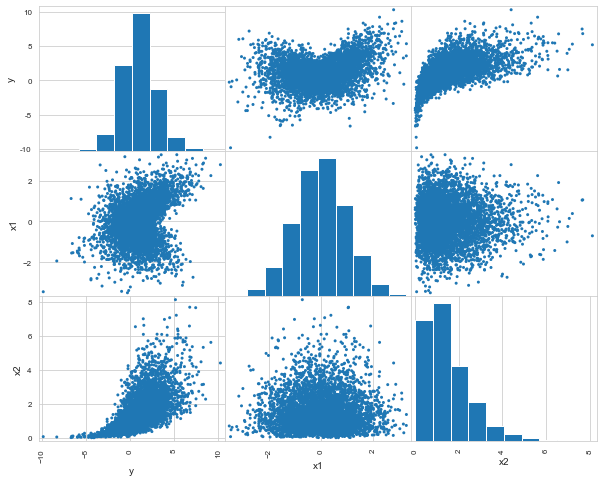

In [62]:
scatter_matrix(pmDF, figsize = (10,8), alpha = 1)
plt.show()

## looks like y depends on $x_1^i$ where i is an even number and on $x_2^{1/2}$










In [63]:
# make x1^2 and sqrt(x2) columns
pmDF['sq_x1'] = pmDF['x1']*pmDF['x1']
pmDF['sqrt_x2'] = np.sqrt(pmDF['x2'])
pmDF['sqrt_sqrt_x2'] = np.sqrt(pmDF['sqrt_x2'])

In [64]:
pmDF.head()

,y,x1,x2,sq_x1,sqrt_x2,sqrt_sqrt_x2
0,1.300215,-0.054425,0.738897,0.002962,0.859591,0.927141
1,-0.805025,0.130174,0.977855,0.016945,0.988866,0.994417
2,2.801926,1.749007,1.352562,3.059024,1.162997,1.078423
3,3.123490,-0.979458,1.664484,0.959338,1.290149,1.135847
4,3.445728,0.300521,2.988848,0.090313,1.728829,1.314849


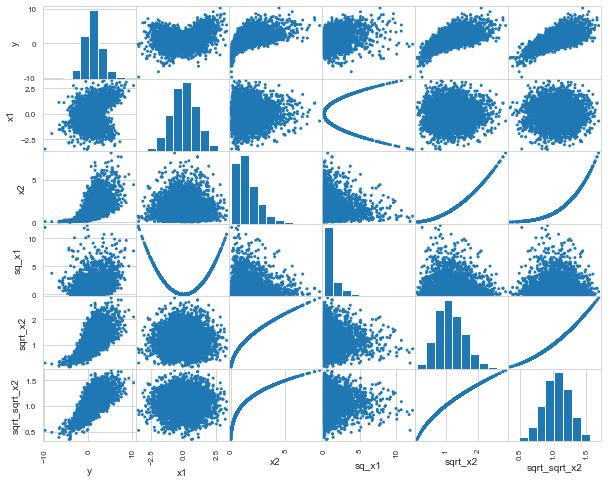

In [65]:
scatter_matrix(pmDF, figsize = (10,8), alpha = 1)
plt.show()

In [92]:
pm_copy = pmDF.copy()
pm_train = pm_copy.sample(frac=0.75, random_state=404)
pm_test = pm_copy.drop(pd_train.index)
print(pd_train.columns)

Index(['y', 'x1', 'x2', 'sq_x1', 'sqrt_x2', 'sqrt_sqrt_x2'], dtype='object')


In [74]:
pm_reg = LinearRegression(copy_X = True)
pm_reg.fit(pm_train[['x1','sq_x1','x2', 'sqrt_sqrt_x2']], pm_train['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print("beta_0_hat is",np.round(pm_reg.intercept_,5))
print("beta_1_hat is",np.round(pm_reg.coef_[0],5))
print("beta_2_hat is",np.round(pm_reg.coef_[1],5))
print("beta_3_hat is",np.round(pm_reg.coef_[2],5))
print("beta_4_hat is",np.round(pm_reg.coef_[3],5))

beta_0_hat is -9.09638
beta_1_hat is 0.54137
beta_2_hat is 0.38665
beta_3_hat is -0.57841
beta_4_hat is 10.07738


In [79]:
pred = pm_reg.predict(pm_train[['x1','sq_x1','x2', 'sqrt_sqrt_x2']])
res = pm_train['y'] - pred

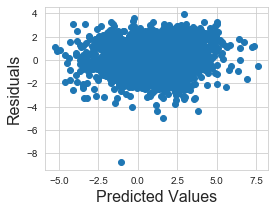

In [80]:
plt.figure(figsize = (4,3))
plt.scatter(pred,res)
plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)
plt.show()

In [81]:
plt.close()

### pretty random

In [ ]:
def loss(model, X_test, y_test):
    pred = model.predict(X_test)
    return np.sum(np.power(pred-y_test, 2))/len(y_test)

In [88]:
pm_X_train, pm_y_train = get_X_y(pm_train, ['x1','sq_x1','x2', 'sqrt_sqrt_x2'], 'y')
pm_X_test, pm_y_test = get_X_y(pm_test, ['x1','sq_x1','x2', 'sqrt_sqrt_x2'], 'y')
pm_loss1 = loss(pm_reg, pm_X_test, pm_y_test)
print(pm_loss1)

1.3057447755688276


In [84]:
pmDF['x1_x2'] = pmDF['x1']*pmDF['x2']

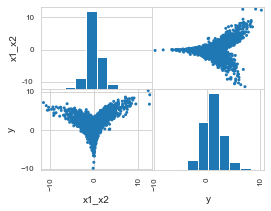

In [85]:
scatter_matrix(pmDF[['x1_x2', 'y']], figsize = (4,3), alpha = 1)
plt.show()

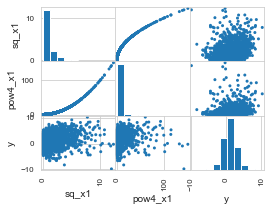

In [87]:
pmDF['pow4_x1'] = pmDF['sq_x1']*pmDF['sq_x1']
scatter_matrix(pmDF[['sq_x1','pow4_x1', 'y']], figsize = (4,3), alpha = 1)
plt.show()

In [91]:
pm_SGD_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
pm_SGD_reg.fit(pm_X_train, pm_y_train)
pm_loss2 = loss(pm_SGD_reg, pm_X_test, pm_y_test)
print(pm_loss2)

1.3167647504618785
